In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DataPreparation

In [3]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [5]:
# Split "Date" with "Year"/"Month"/"Day"
df[["Year", "Month", "Day"]] = df["Date"].str.split("-", expand = True)
df["Year"] = df["Year"].astype("int")
df["Month"] = df["Month"].astype("int")
df["Day"] = df["Day"].astype("int")
df.drop("Date", axis = 1, inplace = True)
df.head(20)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,1005.4,NaN,NaN,20.6,28.9,No,No,2008,12,6
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,1008.2,1.0,NaN,18.1,24.6,No,No,2008,12,7
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,1010.1,NaN,NaN,16.3,25.5,No,No,2008,12,8
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,1003.6,NaN,NaN,18.3,30.2,No,Yes,2008,12,9
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,1005.7,NaN,NaN,20.1,28.2,Yes,No,2008,12,10


# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


In [8]:
df.describe(include = "object")

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


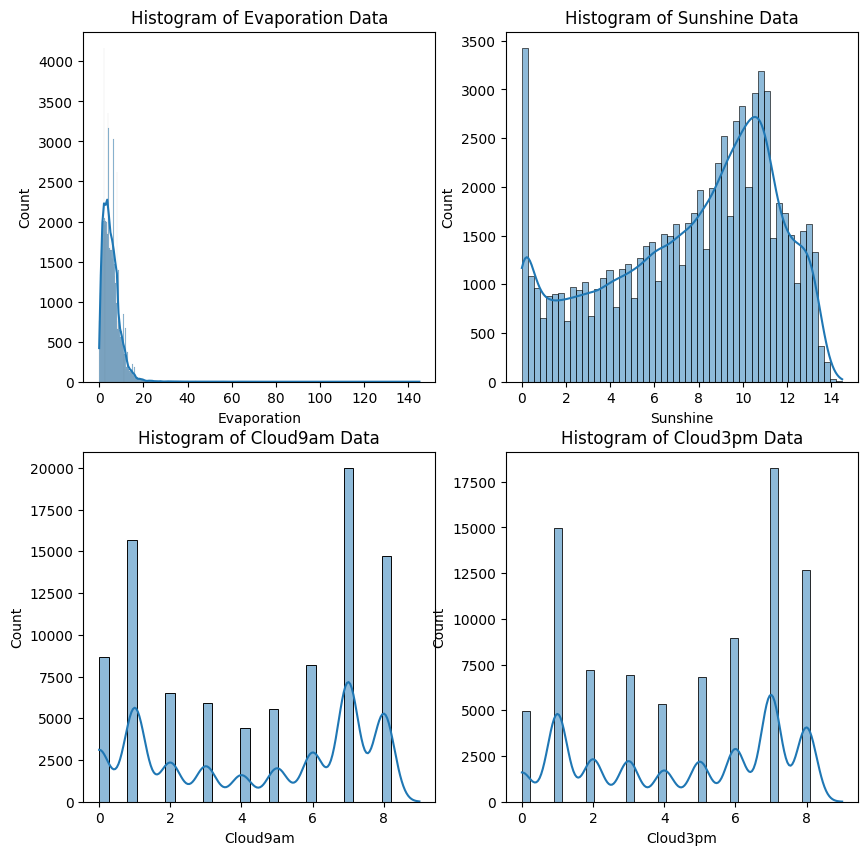

In [9]:
# Show histogram of some features which have many NaN data
plt.figure(figsize = (10, 10))
nan_cols = ["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]
for i, col in enumerate(nan_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x = df[col], kde = True)
    plt.title(f"Histogram of {col} Data")
    plt.plot()

In [10]:
# Fill NaN values of features
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values = np.nan, strategy = "median")
imputer2 = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df["Evaporation"] = imputer1.fit_transform(df[["Evaporation"]])
df["Sunshine"] = imputer1.fit_transform(df[["Sunshine"]])
df["Cloud9am"] = imputer2.fit_transform(df[["Cloud9am"]])
df["Cloud3pm"] = imputer2.fit_transform(df[["Cloud3pm"]])
df["Temp9am"]=imputer2.fit_transform(df[["Temp9am"]])
df["temp3pm"]=imputer2.fit_transform(df[["Temp3pm"]])
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,temp3pm
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,8.0,7.0,16.9,21.8,No,No,2008,12,1,21.8
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,7.0,7.0,17.2,24.3,No,No,2008,12,2,24.3
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,7.0,2.0,21.0,23.2,No,No,2008,12,3,23.2
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,7.0,7.0,18.1,26.5,No,No,2008,12,4,26.5
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,No,2008,12,5,29.7
5,Albury,14.6,29.7,0.2,4.8,8.4,WNW,56.0,W,W,...,7.0,7.0,20.6,28.9,No,No,2008,12,6,28.9
6,Albury,14.3,25.0,0.0,4.8,8.4,W,50.0,SW,W,...,1.0,7.0,18.1,24.6,No,No,2008,12,7,24.6
7,Albury,7.7,26.7,0.0,4.8,8.4,W,35.0,SSE,W,...,7.0,7.0,16.3,25.5,No,No,2008,12,8,25.5
8,Albury,9.7,31.9,0.0,4.8,8.4,NNW,80.0,SE,NW,...,7.0,7.0,18.3,30.2,No,Yes,2008,12,9,30.2
9,Albury,13.1,30.1,1.4,4.8,8.4,W,28.0,S,SSE,...,7.0,7.0,20.1,28.2,Yes,No,2008,12,10,28.2


In [11]:
# Delete rows which have NaN on all feature
df.dropna(axis = 0, inplace = True)
df.shape

(112925, 26)

In [12]:
# Relocate target on end column
df1 = df.copy()
df.drop("RainTomorrow", axis = 1, inplace = True)
df = pd.concat([df, df1["RainTomorrow"]], axis = 1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,temp3pm,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,8.0,7.0,16.9,21.8,No,2008,12,1,21.8,No
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,7.0,7.0,17.2,24.3,No,2008,12,2,24.3,No
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,7.0,2.0,21.0,23.2,No,2008,12,3,23.2,No
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,7.0,7.0,18.1,26.5,No,2008,12,4,26.5,No
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,2008,12,5,29.7,No


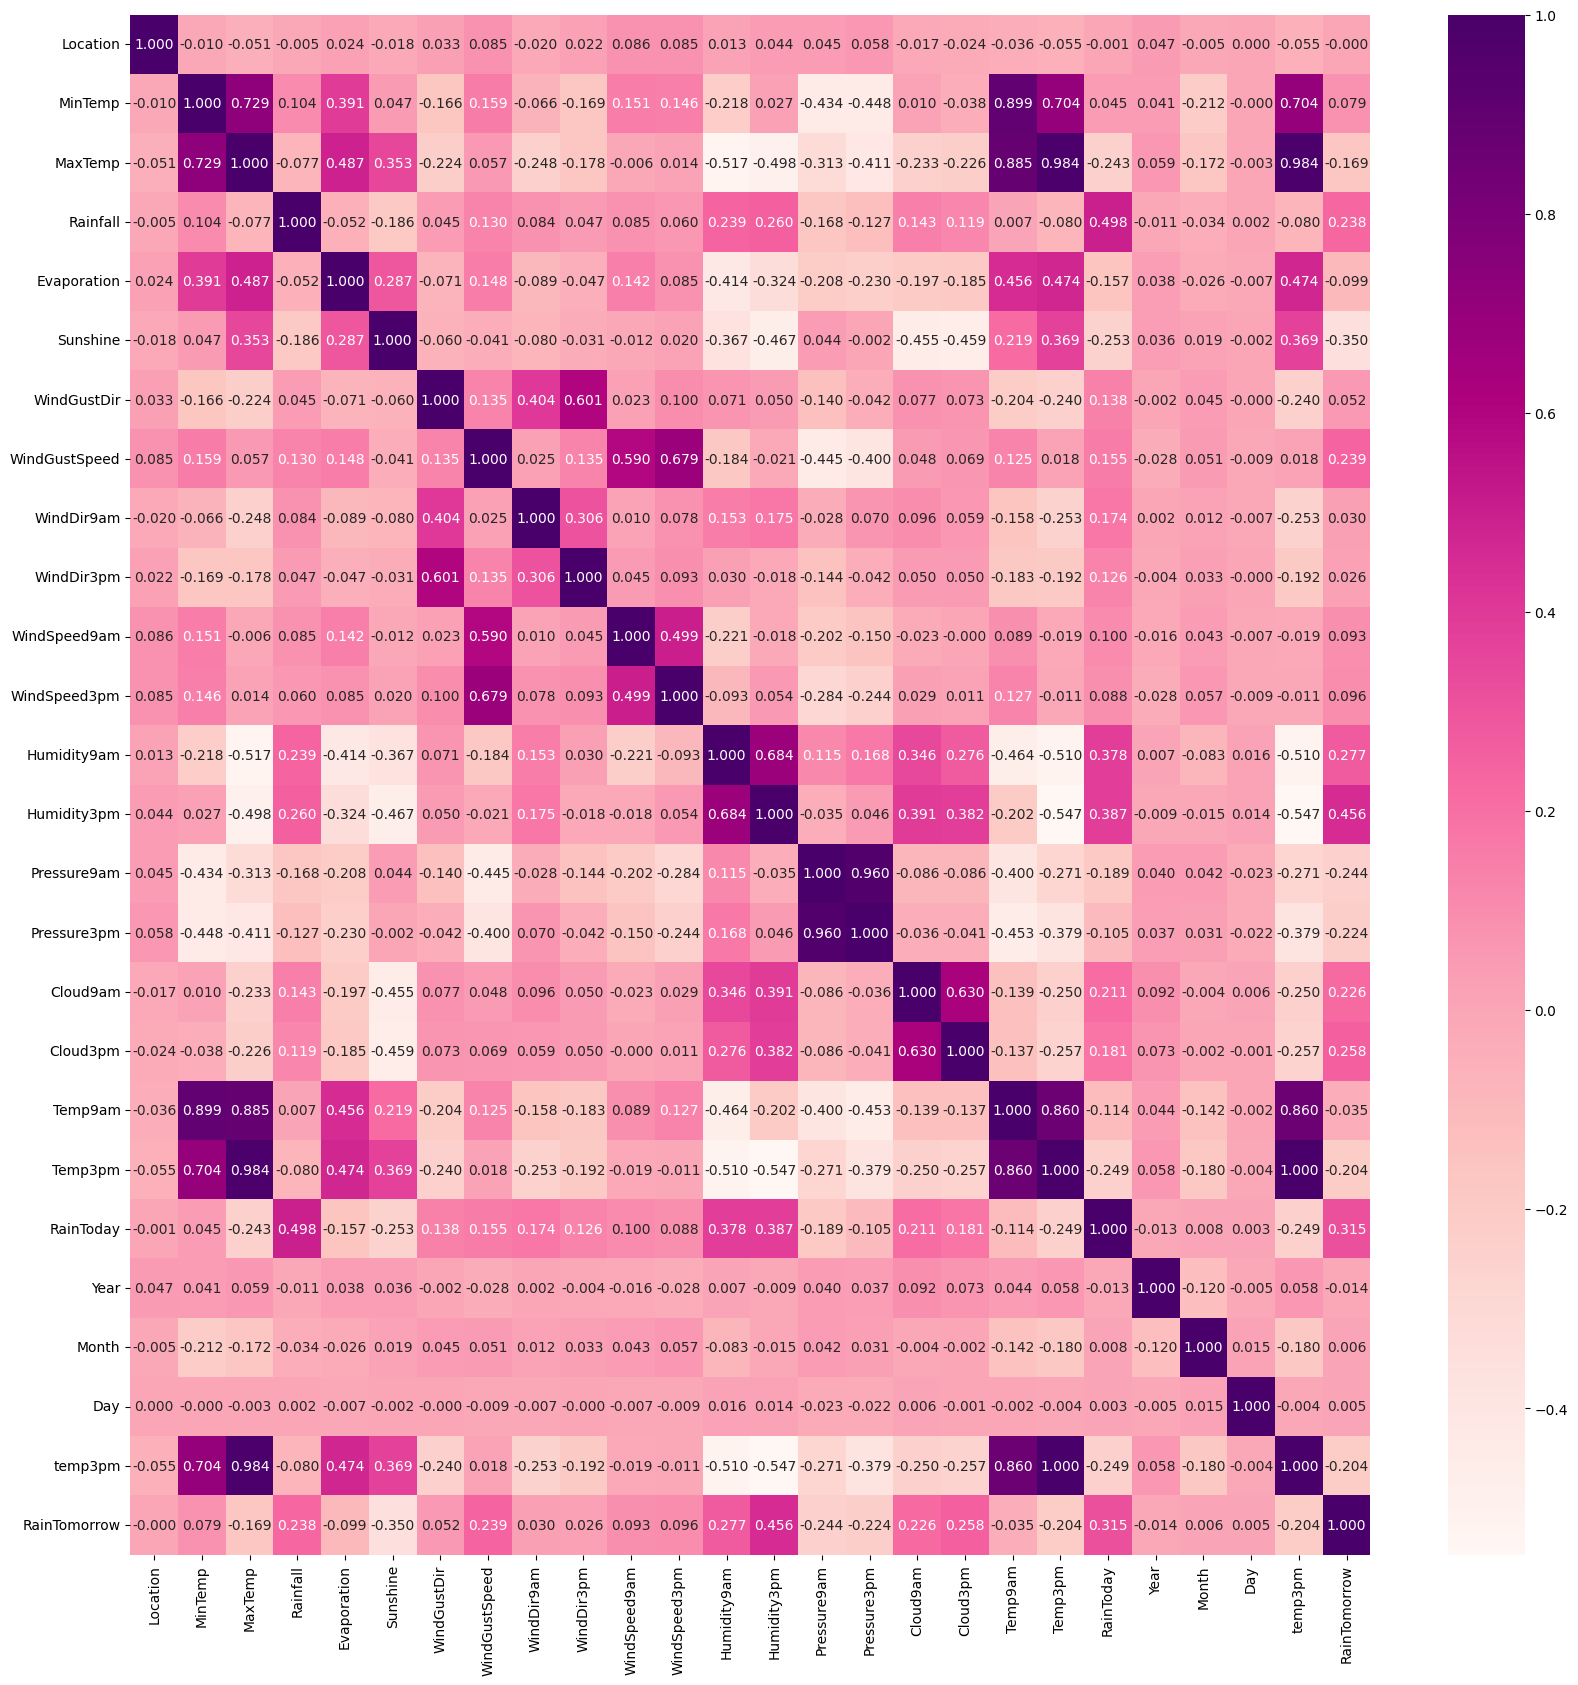

In [15]:
# Correlation all feature with Target
df_corr = df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(df_corr, fmt = ".3f", annot = True, cmap = "RdPu")
plt.show()

In [13]:
df.pivot_table(index = "Location", columns = "RainTomorrow", values = ["MinTemp", "MaxTemp"])

MaxTemp               MinTemp           
RainTomorrow             No        Yes         No        Yes
Location                                                    
Adelaide          24.105343  19.560000  12.990780  12.374720
Albury            24.385938  19.874573  10.206534  10.995446
AliceSprings      29.680453  28.563436  13.235797  18.707930
BadgerysCreek     24.561316  22.942366  10.998127  13.914194
Ballarat          19.349692  15.485235   7.395827   7.551409
Bendigo           22.808326  18.640777   8.890582   9.457670
Brisbane          26.457549  26.486405  15.758567  18.734139
Cairns            29.522222  29.560549  20.451232  22.819451
Canberra          21.150135  20.644930   6.672907   9.672167
Cobar             25.998446  23.881894  12.764294  15.176602
CoffsHarbour      24.072544  23.601203  13.674621  16.456684
Dartmoor          21.543438  17.393247   9.378018   8.985325
Darwin            32.693391  32.115545  22.587826  24.863035
GoldCoast         25.712452  25.711323  16.664128  19.031514
Hobart            18.216340  16.909337   8.948851   9.550474
Katherine         35.070246  34.419608  19.870599  24.499020
Launceston        20.090077  17.696206   8.490932   8.972900
Melbourne         21.493458  19.268714  11.758411  12.034549
MelbourneAirport  20.906098  19.049373   9.791463  10.599687
Mildura           25.288459  22.514286  10.705383  12.433968
Moree             27.250065  25.646726  12.446315  16.151786
MountGambier      21.066020  17.270776   8.932537   8.828995
Nhil              23.261856  18.870763   9.045866   9.595339
NorahHead         22.980557  21.433463  15.209398  15.626357
NorfolkIsland     21.879001  21.577010  16.774558  16.976217
Nuriootpa         22.849107  18.184182   9.465536   9.848545
PearceRAAF        27.555291  21.389698  12.717816  11.741457
Perth             26.216866  21.183172  13.279330  12.247249
PerthAirport      26.612294  21.320683  12.831981  12.033094
Portland          19.120123  16.288846   9.878368   9.141028
Richmond          25.211823  23.624528  11.672783  14.873821
Sale              20.607070  19.344308   8.328420   9.802627
Sydney            23.695327  22.152542  14.822948  15.749831
SydneyAirport     23.826673  22.096386  14.679606  15.465997
Townsville        29.333723  29.834827  19.944839  23.537678
Tuggeranong       21.255061  20.408625   7.496131  10.346853
Uluru             30.467141  30.268182  14.044536  19.434545
WaggaWagga        23.837260  20.258268   9.421553  11.384449
Walpole           21.854640  18.575810  12.343590  11.678704
Watsonia          21.685902  18.955912  10.055561  10.618540
Williamtown       24.648485  23.167969  12.490909  14.167383
Witchcliffe       23.401780  18.867779  11.315592  10.908708
Wollongong        21.654718  20.873252  14.685064  15.754255
Woomera           26.741441  24.972021  13.270776  15.318653

For each location, data is split based on whether it will rain tomorrow ("Yes") or not ("No").Calculates the average minimum and maximum temperatures for each combination of location and rain expectation
This pivot table allows for quick comparison of average temperatures based on rain expectations across different locations.

In [14]:
df.pivot_table(index = "Location", columns = "RainTomorrow", values = ["WindSpeed9am", "WindSpeed3pm"])

WindSpeed3pm            WindSpeed9am           
RainTomorrow               No        Yes           No        Yes
Location                                                        
Adelaide            15.366903  17.545600    10.129551  13.257600
Albury              14.745949  16.963947     9.412441  11.865275
AliceSprings        18.411998  18.242291    15.860151  16.841410
BadgerysCreek       14.814339  13.982796     9.231675   9.483871
Ballarat            21.859649  26.822819    19.697013  23.034899
Bendigo             17.571884  18.489320    14.137853  13.968932
Brisbane            11.225615  10.811178     7.147583   7.028701
Cairns              22.182001  21.741758    15.804424  16.951648
Canberra            19.171467  20.282306    11.505851  12.103380
Cobar               14.870757  16.339833    14.433947  15.963788
CoffsHarbour        21.649074  20.631016    14.862998  17.237968
Dartmoor            18.341207  21.074026    12.178478  15.070130
Darwin              20.999565  20.499388    15.418261  14.430845
GoldCoast           25.497605  27.020464    18.566092  22.129604
Hobart              19.409787  21.792963    16.120426  17.884980
Katherine           15.987676  14.529412    12.392606  12.196078
Launceston          16.146279  17.810298     9.751925  10.794038
Melbourne           21.438084  23.654511    18.438668  21.608445
MelbourneAirport    22.714286  25.289969    19.786150  23.310345
Mildura             16.642912  18.993651    14.305190  15.523810
Moree               16.741387  18.541667    18.052769  20.693452
MountGambier        21.524378  25.176941    16.986070  20.143836
Nhil                20.623245  24.559322    16.693448  18.097458
NorahHead           19.950771  24.470284    12.924913  17.667959
NorfolkIsland       21.651186  22.739524    19.949520  21.183465
Nuriootpa           17.178571  22.954545    13.938839  18.385455
PearceRAAF          19.784466  23.635678    16.471359  16.605528
Perth               14.562629  15.153722    11.112857  11.396440
PerthAirport        20.814111  23.701439    18.119561  17.410072
Portland            19.087759  24.552861    15.101174  19.679922
Richmond            16.681650  15.426887     9.495074  10.283019
Sale                22.185305  23.695271    14.346580  16.103327
Sydney              19.793889  19.569492    15.038945  16.032203
SydneyAirport       25.646654  26.294511    17.906508  20.538153
Townsville          24.813205  22.653768    15.674885  16.606925
Tuggeranong         15.785904  14.545455     9.717011   9.207459
Uluru               17.007485  17.836364    18.095808  16.663636
WaggaWagga          16.009162  17.909449    13.183246  14.551181
Walpole             17.213675  19.340278    14.042125  17.050926
Watsonia            15.266341  16.896350     9.941463  12.715328
Williamtown         22.841355  22.187500    16.904337  16.794922
Witchcliffe         20.040516  20.017417    14.855126  16.496372
Wollongong          21.633476  24.010638    16.379327  19.723404
Woomera             20.480876  25.077720    20.111029  21.637306

we can easily see how wind speeds differs depending on whether it is expected to rain tomorrow.
For example, Brisbane has a lower wind speed at 3 PM when it is expected to rain compared to when it is not expected to rain.
whereas Uluru has high wind speed at 3pm and low wind speed at 9am when it is expected to rain 

In [15]:
df.pivot_table(index = "Location", columns = "RainTomorrow", values = ["Pressure9am", "Pressure3pm"])

Pressure3pm               Pressure9am             
RainTomorrow               No          Yes           No          Yes
Location                                                            
Adelaide          1017.610591  1012.209280  1019.591206  1013.924320
Albury            1015.833769  1010.619545  1018.336435  1013.319734
AliceSprings      1012.880691  1008.915419  1016.755979  1012.068722
BadgerysCreek     1015.738149  1015.063226  1018.544676  1017.315054
Ballarat          1017.747321  1011.619195  1019.267805  1013.379732
Bendigo           1016.578617  1010.388738  1018.595132  1013.063301
Brisbane          1015.397371  1014.349396  1018.582443  1017.213897
Cairns            1011.630166  1010.146923  1014.812971  1012.900549
Canberra          1016.811926  1011.621272  1019.395545  1014.643936
Cobar             1015.955092  1012.322563  1018.627771  1014.980223
CoffsHarbour      1015.675519  1016.389439  1018.240539  1018.375134
Dartmoor          1017.493963  1011.000519  1018.927559  1012.292727
Darwin            1009.318783  1005.739412  1013.049087  1008.788005
GoldCoast         1015.349330  1015.021419  1018.111015  1017.544338
Hobart            1014.899745  1006.539242  1016.374128  1008.382815
Katherine         1009.058803  1003.917647  1013.405634  1008.057843
Launceston        1014.726433  1007.316802  1016.227117  1010.218970
Melbourne         1017.246904  1010.978887  1019.210514  1012.609789
MelbourneAirport  1017.551394  1011.521630  1019.348214  1013.322414
Mildura           1016.780868  1010.667619  1019.233656  1013.495556
Moree             1015.301134  1012.185714  1018.714086  1015.396429
MountGambier      1018.353930  1011.541553  1019.942836  1013.031963
Nhil              1017.354290  1010.075847  1019.414197  1012.629661
NorahHead         1015.927847  1016.175194  1018.324117  1017.994057
NorfolkIsland     1016.991469  1013.544960  1018.538920  1015.694904
Nuriootpa         1017.646920  1012.171818  1019.864866  1013.952727
PearceRAAF        1015.543058  1012.639196  1018.273544  1014.546231
Perth             1016.044440  1012.150485  1018.581563  1013.917961
PerthAirport      1015.974989  1012.150180  1018.641276  1014.032194
Portland          1018.796423  1012.645490  1019.847177  1013.730359
Richmond          1014.867857  1014.887500  1017.896736  1017.166274
Sale              1017.179898  1010.716287  1019.156470  1012.257093
Sydney            1016.038406  1015.725593  1018.545117  1017.512712
SydneyAirport     1016.019294  1015.867604  1018.577406  1017.807363
Townsville        1012.540702  1008.816497  1015.873464  1011.691242
Tuggeranong       1015.779067  1011.078788  1018.374351  1014.075058
Uluru             1013.706737  1008.359091  1017.561976  1011.750909
WaggaWagga        1016.676440  1011.571457  1019.288220  1014.496063
Walpole           1017.545177  1012.300810  1019.346398  1013.565394
Watsonia          1017.365854  1011.286569  1019.390049  1012.889197
Williamtown       1015.779798  1015.877148  1018.478372  1017.720117
Witchcliffe       1017.707673  1012.748911  1019.458870  1014.054427
Wollongong        1016.009294  1015.761246  1018.286107  1017.352888
Woomera           1016.268214  1011.094301  1018.907501  1014.027461

The pivot table allows one to compare how atmospheric presssure varies depending on whether it is expected to rain tomorrow.
we can see for most of places the average atmospheric pressure is low when it is expected to rain except NorahHead at 3pm

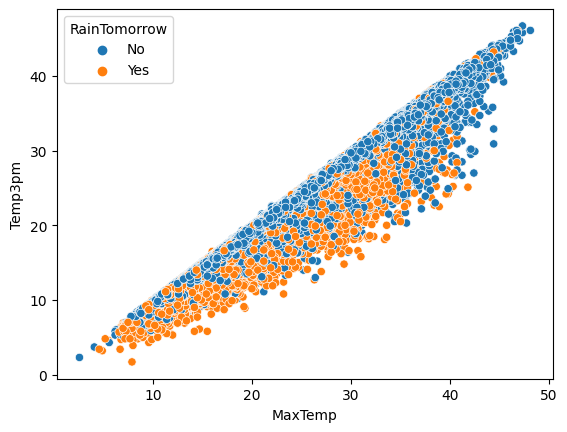

In [16]:
# Top correlation of this data
sns.scatterplot(x = df["MaxTemp"], y = df["Temp3pm"], hue = df["RainTomorrow"])
plt.show()

The clustering of points along a diagonal line suggests a positive correlation between MaxTemp and Temp3pm. This means that as the maximum temperature of the day increases, the temperature at 3 PM also tends to increase.
Most points on the diagonal line with RainTomorrow = "No" being more prominent, this could indicate that on days without rain, higher maximum temperatures are associated with higher 3 PM temperatures.

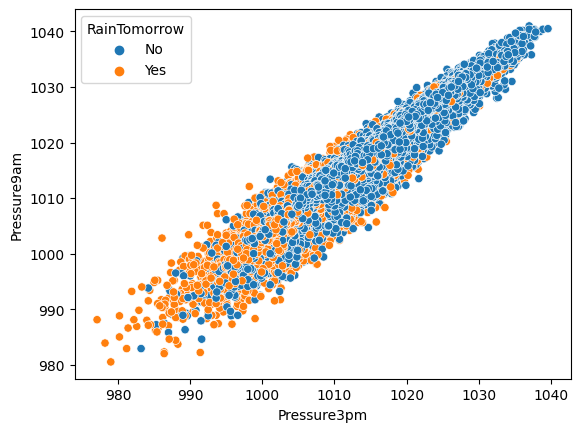

In [17]:
# Second top correlation of this data
sns.scatterplot(x = df["Pressure3pm"], y = df["Pressure9am"], hue = df["RainTomorrow"])
plt.show()

the plot suggests that points are clustered along a diagonal line, it indicates a positive correlation between Pressure3pm and Pressure9am. This suggests that higher atmospheric pressure at 9 AM is associated with higher atmospheric pressure at 3 PM.

In [19]:
# Change object type to numerical type
cat_cols = []
for col in df.columns:
    if df[col].dtypes == "object":
        cat_cols.append(col)
        
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,temp3pm,RainTomorrow
0,1,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,8.0,7.0,16.9,21.8,0,2008,12,1,21.8,0
1,1,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,7.0,7.0,17.2,24.3,0,2008,12,2,24.3,0
2,1,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,7.0,2.0,21.0,23.2,0,2008,12,3,23.2,0
3,1,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,7.0,7.0,18.1,26.5,0,2008,12,4,26.5,0
4,1,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,2008,12,5,29.7,0


In [17]:
cat_cols

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

# Model Preparation

In [22]:
# Split data with train & test
X = df.drop("RainTomorrow",axis=1)
y = df["RainTomorrow"]


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112925 entries, 0 to 145458
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  int64  
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   Evaporation    112925 non-null  float64
 5   Sunshine       112925 non-null  float64
 6   WindGustDir    112925 non-null  int64  
 7   WindGustSpeed  112925 non-null  float64
 8   WindDir9am     112925 non-null  int64  
 9   WindDir3pm     112925 non-null  int64  
 10  WindSpeed9am   112925 non-null  float64
 11  WindSpeed3pm   112925 non-null  float64
 12  Humidity9am    112925 non-null  float64
 13  Humidity3pm    112925 non-null  float64
 14  Pressure9am    112925 non-null  float64
 15  Pressure3pm    112925 non-null  float64
 16  Cloud9am       112925 non-null  float64
 17  Cloud3pm       112925 non-null  fl

In [24]:
X=X.drop('temp3pm',axis=1)

In [26]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,1,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,1007.7,1007.1,8.0,7.0,16.9,21.8,0,2008,12,1
1,1,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,1010.6,1007.8,7.0,7.0,17.2,24.3,0,2008,12,2
2,1,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,1007.6,1008.7,7.0,2.0,21.0,23.2,0,2008,12,3
3,1,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,1017.6,1012.8,7.0,7.0,18.1,26.5,0,2008,12,4
4,1,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,36,3.5,21.8,0.0,4.8,8.4,0,31.0,2,0,...,1024.7,1021.2,7.0,7.0,9.4,20.9,0,2017,6,20
145455,36,2.8,23.4,0.0,4.8,8.4,0,31.0,9,1,...,1024.6,1020.3,7.0,7.0,10.1,22.4,0,2017,6,21
145456,36,3.6,25.3,0.0,4.8,8.4,6,22.0,9,3,...,1023.5,1019.1,7.0,7.0,10.9,24.5,0,2017,6,22
145457,36,5.4,26.9,0.0,4.8,8.4,3,37.0,9,14,...,1021.0,1016.8,7.0,7.0,12.5,26.1,0,2017,6,23


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [28]:
# Standardization of X_train & X_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build ML - Prediction

In [29]:
X_train

array([[ 0.5212794 ,  0.16636536,  0.95244512, ..., -0.69093079,
         1.60209768,  0.60394858],
       [ 0.12975645,  0.93479435, -0.36527574, ...,  0.09944931,
         1.60209768,  0.94523816],
       [-0.73159405,  1.9433574 ,  1.49672113, ..., -1.87650095,
         0.73887427,  0.26265899],
       ...,
       [-0.41837569, -1.11434963, -0.55147543, ..., -1.48131089,
         1.31435654, -1.10249935],
       [-1.59294455, -0.00973295,  0.79489154, ..., -0.29574074,
        -1.56305483, -1.10249935],
       [ 0.20806104, -0.08977764, -0.75199817, ..., -1.48131089,
         1.02661541, -0.41992018]])

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga')  
model=model.fit(X_train, y_train)

In [31]:
y_lr = model.predict(X_test).round()

In [32]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_lr)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16572   952]
 [ 2472  2589]]


True Negatives (TN): 16572

False Positives (FP): 952

False Negatives (FN): 2472

True Positives (TP): 2589

In [33]:
from sklearn.metrics import classification_report


class_report = classification_report(y_test, y_lr)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17524
           1       0.73      0.51      0.60      5061

    accuracy                           0.85     22585
   macro avg       0.80      0.73      0.75     22585
weighted avg       0.84      0.85      0.84     22585



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_lr)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision
precision = precision_score(y_test, y_lr)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_lr)
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_lr)
print(f"F1-Score: {f1:.2f}")

Accuracy: 84.84%
Precision: 0.73
Recall: 0.51
F1-Score: 0.60


In [46]:
import joblib
joblib.dump(model, 'my_model21.pkl')

['my_model21.pkl']

In [ ]:
!pip install --upgrade scikit-learn


In [14]:
import sklearn
print(sklearn.__version__)  

1.5.2
